# Production decline analysis : Chapter 1

**Divyanshu Vyas | Oil and Gas Data Science/Machine Learning**

> LinkedIn - www.linkedin.com/in/divyanshu-vyas

> GitHub - https://github.com/Divyanshu-ISM



> Lit. Ref. : Boyun Guo | Tarek Ahmed

Production decline analysis is a traditional means of
identifying well production problems and predicting
well performance and life based on real production
data. It uses empirical decline models that have little
fundamental justifications. These models include the
following:

. Exponential decline (constant fractional decline)

. Harmonic decline

. Hyperbolic decline

## 1. Hyperbolic-Decline Model

The Most Generic model of all. The constants **b** and **d** are determined by production data.
> ### $ \frac{1}{q} \frac{dq}{dt} = -b q^{d} $

>> 0<d<1 : Hyperbolic Model | d=0 : Exponential Model | d=1 : Harmonic Model

### Example 1: Exponential Decline

Given that a well has declined from
100 stb/day to 96 stb/day during a 1-month period, use the
exponential decline model to perform the following tasks:
1. Predict the production rate after 11 more months
2. Calculate the amount of oil produced during the first
year
3. Project the yearly production for the well for the next 5
years

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
t_1m = 1 #month
q_1m = 96 #stb/d

t_0m = 0 #month
q_0m = 100 #stb/d

b = np.log(q_0m/q_1m)/(t_1m - t_0m)


print(f'The Decline Rate b is {b} /month')

The Decline Rate b is 0.0408219945202552 /month


In [27]:
# Now using this per month decline, we can calculate the Flow Rate at the end of 1 yr. 

def q_calculator_exp(month):
    
    return q_0m*np.exp(-month*b)


q_12m = q_calculator_exp(12)


print(f'The flowrate at the end of 12 months is: {q_12m} STB/Day')

The flowrate at the end of 12 months is: 61.27097573297669 STB/Day


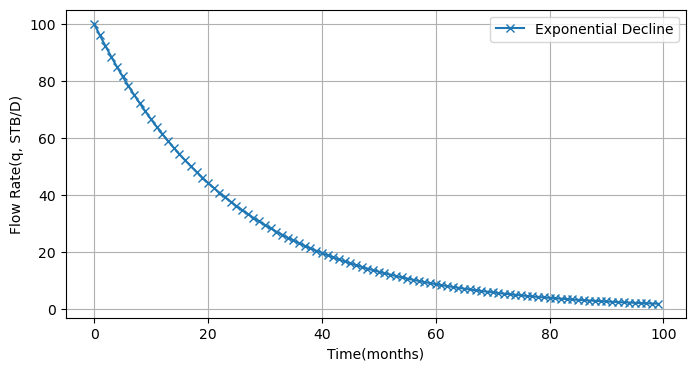

In [24]:
#Let's visualize how this flowrate v/s time looks like. 

t = np.arange(0,100,1)

q = q_calculator_exp(t)

plt.figure(figsize=(8,4))
plt.style.use('default')

plt.plot(t,q,marker='x',label='Exponential Decline')

plt.ylabel('Flow Rate(q, STB/D)')
plt.xlabel('Time(months)')
plt.legend()
plt.grid()

In [29]:
#Production rate after 11 MORE months - Means at the end of 1 Year. (1 + 11)

#At the end of 5 yrs, Total Months = 5*12

q_5yr = q_calculator_exp(60)

print(f'The flowrate at the end of 5yrs is: {q_5yr} STB/Day')


The flowrate at the end of 5yrs is: 8.635231448510442 STB/Day


## Calculation of Cummulative Production.

> ### $ N_{p} = \frac { q_0 - q_0 e^{-bt} } {b} $



In [32]:
def Np_exp(t):
    
    Np = (q_0m - q_0m*np.exp(-b*t))/b
    
    return Np


Np_monthwise = Np_exp(t)

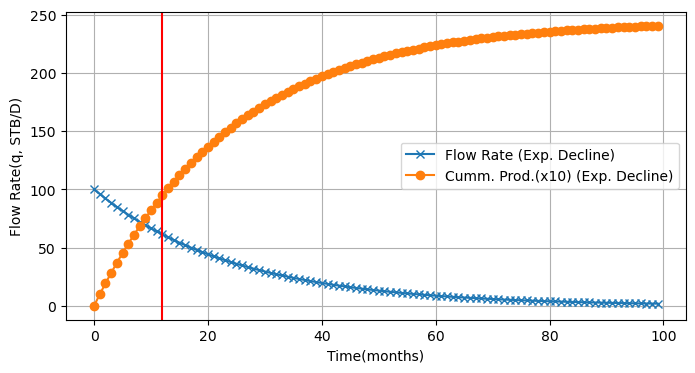

In [41]:
plt.figure(figsize=(8,4))
plt.style.use('default')

plt.plot(t,q,marker='x',label='Flow Rate (Exp. Decline)')
plt.plot(t,Np_monthwise/10,marker='o',label='Cumm. Prod.(x10) (Exp. Decline)')

Np_1yr= Np_exp(12)
Np_2yr= Np_exp(24)
Np_3yr= Np_exp(36)
Np_4yr= Np_exp(48)
Np_5yr= Np_exp(60)


plt.axvline(12,c='red')

plt.ylabel('Flow Rate(q, STB/D)')
plt.xlabel('Time(months)')
plt.legend()
plt.grid()

Text(0.5, 1.0, 'Exponential Decline Analysis')

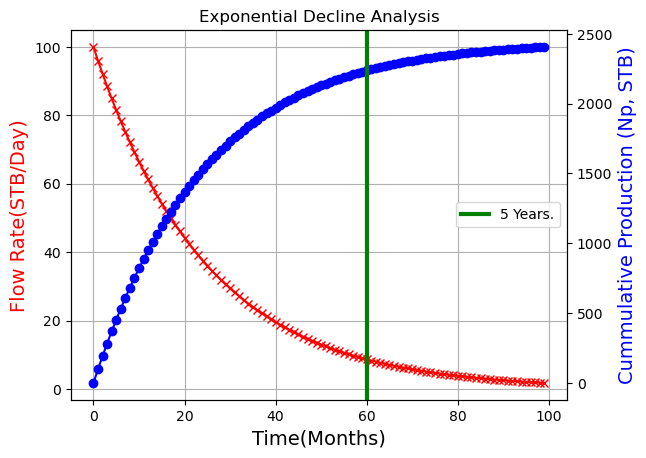

In [66]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(t,q, color="red", marker="x")
# set x-axis label
ax.set_xlabel("Time(Months)",fontsize=14)
# set y-axis label
ax.set_ylabel("Flow Rate(STB/Day)",color="red",fontsize=14)
ax.grid()



ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(t,Np_monthwise,color="blue",marker="o")
ax2.set_ylabel("Cummulative Production (Np, STB)",color="blue",fontsize=14)

ax2.axvline(60,color='green',lw=3,label='5 Years.')
ax2.legend(loc='center right')


plt.title('Exponential Decline Analysis')

In [2]:
###########################

# Chapter 2 : All Models and a Full-Proof DCA Workflow

## A. Harmonic Model 

### $ \frac{1}{q} \frac {dq}{dt} = - bq $

### $ q = \frac {q_0} {1 + bt} $

## A.1 Basis For Log-Log diagnosis of Harmonic Decline : log-log straight line
> ### $ ln(q) = ln(q_0) - ln(1 + bt) $ 
### $ N_p = \frac {q_0} {b} ln(1 + bt) = \frac {q_0} {b} [ ln(q_0) - ln(q) ] $

## B. Hyperbolic Model 

### $ q = \frac {q_0} { (1 + bdt)^{1/d}} $

Here, a = 1/d

### $ q = \frac {q_0} { (1 + \frac{b}{a}t)^{a}} $

### $ N_p = \frac {b}{b(a-1)} [q_0 - q(1 + \frac{b}{a}t) ]   $

In [4]:
################################################

# Example 2 : DCA Workflow

For the data given,
identify a suitable decline model, determine model
parameters, and project production rate until a marginal
rate of 25 stb/day is reached.

In [86]:
df = pd.read_excel('DCA.xlsx')

In [87]:
df.head()

,t(months),q(stb/day)
0,1,904.84
1,2,818.73
2,3,740.82
3,4,670.32
4,5,606.53


In [88]:
t = df['t(months)'].values

q = df['q(stb/day)'].values

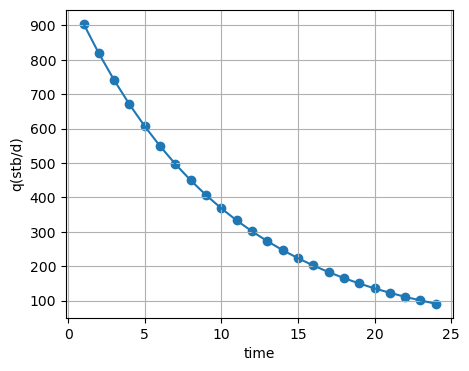

In [89]:
plt.style.use('default')
plt.figure(figsize=(5,4))

plt.plot(t,q,label='Cartesian q vs t')
plt.scatter(t,q,label='Cartesian q vs t')
# plt.plot(np.log(t), q, label='Semi-Log q vs t')
# plt.plot(np.log(t), np.log(q))

plt.xlabel('time')
plt.ylabel('q(stb/d)')

plt.grid()

#looks like an exponential decline. Still need evidence.

In [90]:
#Let's Check if it is really exponential or not. 
#We know that in exponential decline, the b is constant. b = -dq/q/dt

df['dq'] = np.zeros(len(df))
df['dq'].iloc[1:] = -np.diff(df['q(stb/day)'])

df['dt'] = np.zeros(len(df))
df['dt'].iloc[1:] = np.diff(df['t(months)'])


df['-dq/(qdt)'] = np.round(df['dq']/df['q(stb/day)'],decimals=3)

df.head()


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,t(months),q(stb/day),dq,dt,-dq/(qdt)
0,1,904.84,0.00,0.0,0.000
1,2,818.73,86.11,1.0,0.105
2,3,740.82,77.91,1.0,0.105
3,4,670.32,70.50,1.0,0.105
4,5,606.53,63.79,1.0,0.105


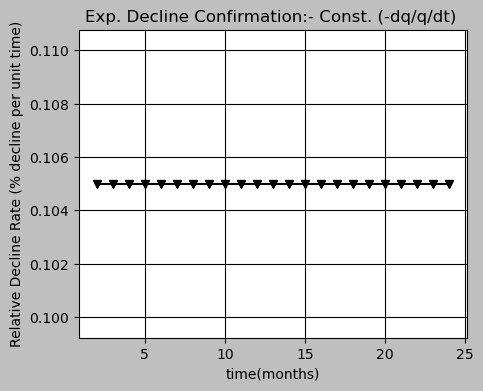

In [170]:
plt.style.use('grayscale')
plt.figure(figsize=(5,4))

# plt.plot(df['t(months)'][1:], df['-dq/(qdt)'][1:])
plt.plot(df['t(months)'][1:], df['-dq/(qdt)'][1:],marker='v')

plt.xlabel('time(months)')
plt.ylabel('Relative Decline Rate (% decline per unit time)')

plt.title('Exp. Decline Confirmation:- Const. (-dq/q/dt) ')

# plt.legend()

plt.grid()

In [137]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# Production Forecasting

Now that we've confirmed the Exponential Decline, we can forecast production rates for the future.

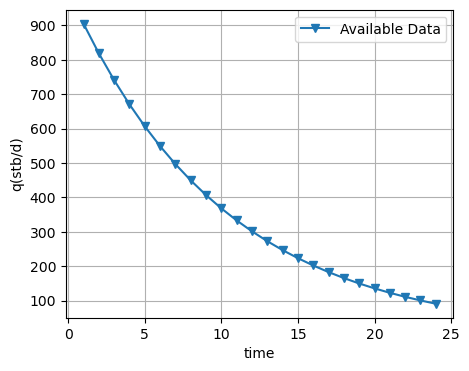

In [96]:
# plt.scatter(df['t(months)'],df['q(stb/day)'],marker='v')
plt.style.use('defaul')
plt.figure(figsize=(5,4))

# plt.plot(t,q,label='Cartesian q vs t')
plt.plot(df['t(months)'],df['q(stb/day)'],marker='v',label='Available Data')
# plt.plot(np.log(t), q, label='Semi-Log q vs t')
# plt.plot(np.log(t), np.log(q))

plt.xlabel('time')
plt.ylabel('q(stb/d)')

plt.legend()
plt.grid()


In [99]:
# df.head()

b = np.log(904.84/606.53)/(4)

print(f'b is {b} per month!')

b is 0.10000098529758515 per month!


In [107]:
def qexp_calc(t):
    
    
    
    qo = 904.84
    
    return qo*np.exp(-b*t)


t_future = np.arange(24,41,1)

q_future = qexp_calc(t_future)

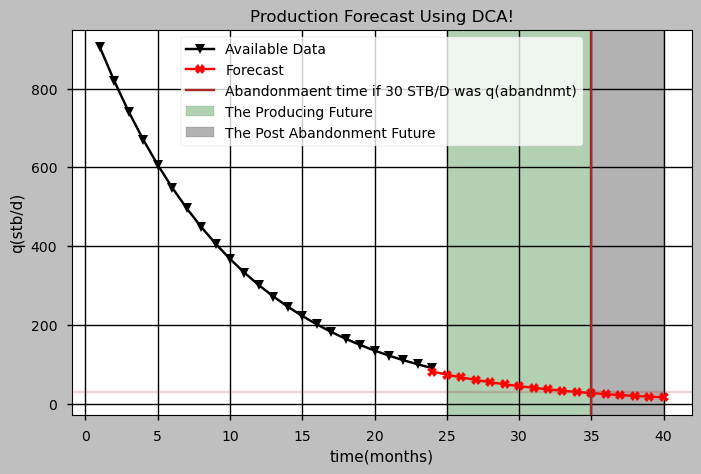

In [140]:
# plt.scatter(df['t(months)'],df['q(stb/day)'],marker='v')
plt.style.use('grayscale')
plt.figure(figsize=(8,5))

# plt.plot(t,q,label='Cartesian q vs t')
plt.plot(df['t(months)'],df['q(stb/day)'],marker='v',label='Available Data')

plt.plot(t_future, q_future, color='red', marker = 'X' , label='Forecast')

# plt.axvspan(25,40,color='green', alpha=0.3, label='The Future')

plt.axhline(y=30,color='brown',alpha=0.2)
plt.axvline(x=35,color='brown',label='Abandonmaent time if 30 STB/D was q(abandnmt)')

plt.axvspan(25,35,color='darkgreen', alpha=0.3, label='The Producing Future')
plt.axvspan(35,40,color='black', alpha=0.3, label='The Post Abandonment Future')
plt.xlabel('time(months)')
plt.ylabel('q(stb/d)')


plt.title('Production Forecast Using DCA!')

plt.legend()
plt.grid()

# Chapter 3 :- Working with Production Data : Example.